# Deep Learning: Ex.5 - Training ConvNets

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from seaborn import heatmap 

print(tf.__version__)

2.5.0


### Load the CIFAR-10 Dataset

We will use the same CIFAR-10 dataset as in Ex.4:

In [ ]:
# 1. load/download the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# 2. flatten the labels (easier to deal with)
train_labels = train_labels.flatten()  # (50000, 1) -> (50000,)
test_labels = test_labels.flatten()    # (10000, 1) -> (10000,)

# 3. convert uint8->float32 and normalize range to 0.0-1.0 
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 4. define the 10 classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# 5. print the shapes
print('train_images.shape =',train_images.shape)
print('train_labels.shape =',train_labels.shape)
print('test_images.shape =',test_images.shape)
print('test_labels.shape =',test_labels.shape)


train_images.shape = (50000, 32, 32, 3)
train_labels.shape = (50000,)
test_images.shape = (10000, 32, 32, 3)
test_labels.shape = (10000,)


***

We will use a single model (the same last one from Ex.4) in this exercise:

Apply the following layers (between the input and output layers):
- 32 3x3-`Conv2D` + 2x2 `MaxPooling` + `Dropout(0.2)`
- 64 3x3-`Conv2D` + 2x2 `MaxPooling` + `Dropout(0.2)`
- 128 3x3-`Conv2D` + 2x2 `MaxPooling` + `Dropout(0.2)`
- 128-`Dense` + `Dropout(0.5)`

Use `padding='same'` in the Conv2D layers.

Prepeare a function that returns this model (without the `compile` part, just the layers)



In [ ]:
def make_model():
    the_model = Sequential()
    the_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape = (32,32,3)))
    the_model.add(MaxPooling2D(pool_size=(2, 2)))
    the_model.add(Dropout(0.2))
    the_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    the_model.add(MaxPooling2D(pool_size=(2, 2)))
    the_model.add(Dropout(0.2))
    the_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    the_model.add(MaxPooling2D(pool_size=(2, 2)))
    the_model.add(Dropout(0.2))
    the_model.add(Flatten())
    the_model.add(Dense(128, activation='relu'))
    the_model.add(Dropout(0.5))
    the_model.add(Dense(10, activation='softmax'))
    return the_model

---

We will train the same model, each time using a different optimizer:
- SGD with learning_rate = 0.2
- SGD with learning_rate = 0.01 
- SGD with learning_rate = 0.01 and momentum = 0.9
- Adam (with its default parameters)

In order to train each model from scratch (and not to continue training the same model again and again), create a new model each time (m1, m2, m3, m4).

Also, use a **different variable** to record the `history` of the training results (h1, h2, h3, h4).

Train each model for 100 epochs with a batch size of 64 (remember to use a GPU), and plot the usual graphs (loss&accuracy for train&test).



***
### 1. SGD with learning_rate = 0.2


0.7139599919319153
0.7179999947547913


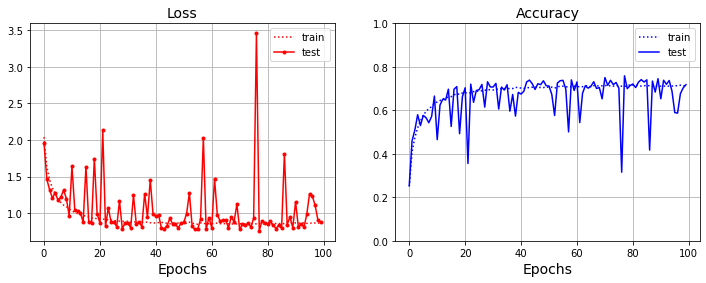

In [ ]:
m1 = make_model()
optimizer = keras.optimizers.SGD(learning_rate= 0.2)
m1.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy'
              ,metrics=['accuracy'])
h1 = m1.fit(train_images, train_labels, epochs=100, batch_size=64
                    , verbose=0, 
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(h1.history['loss'],':r')
plt.plot(h1.history['val_loss'],'.-r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()

plt.subplot(1,2,2)
plt.plot(h1.history['accuracy'],':b')
plt.plot(h1.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()
print(h1.history['accuracy'][-1])
print(h1.history['val_accuracy'][-1])

***
### 2. SGD with learning_rate = 0.01 



0.7767199873924255
0.7720999717712402


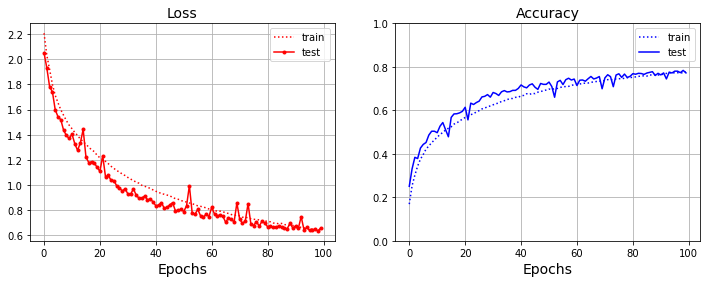

In [ ]:
m2 = make_model()
optimizer = keras.optimizers.SGD(learning_rate= 0.01)
m2.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy'
              ,metrics=['accuracy'])
h2 = m2.fit(train_images, train_labels, epochs=100, batch_size=64
                    , verbose=0, 
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(h2.history['loss'],':r')
plt.plot(h2.history['val_loss'],'.-r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()

plt.subplot(1,2,2)
plt.plot(h2.history['accuracy'],':b')
plt.plot(h2.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()
print(h2.history['accuracy'][-1])
print(h2.history['val_accuracy'][-1])

***
### 3. SGD with learning_rate = 0.01 and momentum = 0.9


0.8209800124168396
0.7997999787330627


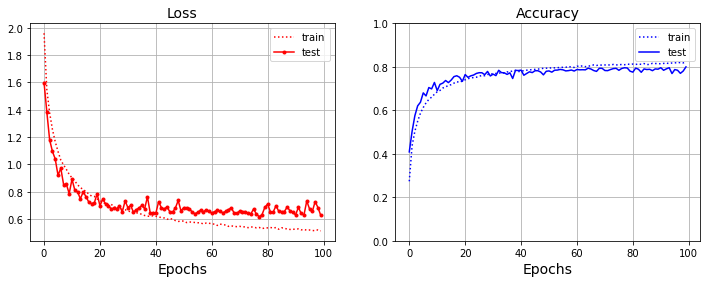

In [ ]:
m3 = make_model()
optimizer = keras.optimizers.SGD(learning_rate= 0.01, momentum=0.9)
m3.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy'
              ,metrics=['accuracy'])
h3 = m3.fit(train_images, train_labels, epochs=100, batch_size=64
                    , verbose=0, 
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(h3.history['loss'],':r')
plt.plot(h3.history['val_loss'],'.-r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()

plt.subplot(1,2,2)
plt.plot(h3.history['accuracy'],':b')
plt.plot(h3.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()
print(h3.history['accuracy'][-1])
print(h3.history['val_accuracy'][-1])

### 4. Adam (with its default parameters)

0.8384000062942505
0.8091999888420105


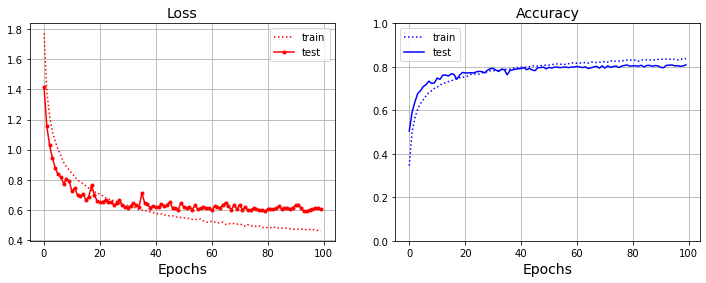

In [ ]:
m4 = make_model()
m4.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy'
              ,metrics=['accuracy'])
h4 = m4.fit(train_images, train_labels, epochs=100, batch_size=64
                    , verbose=0, 
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(h4.history['loss'],':r')
plt.plot(h4.history['val_loss'],'.-r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()

plt.subplot(1,2,2)
plt.plot(h4.history['accuracy'],':b')
plt.plot(h4.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()
print(h4.history['accuracy'][-1])
print(h4.history['val_accuracy'][-1])

---
### Graphical comparison 

For each of the benchmark graphs (train-loss, val-loss, train-acc, val-loss) plot a single graph with all 4 runs (use different color for each of the runs). 

Use `plt.subplot()`

Add graph labels and legends.

m1: val_loss= 0.8791941404342651
m2: val_loss= 0.6566673517227173
m3: val_loss= 0.6039994955062866
m4: val_loss= 0.6270803809165955
m1: val_accuracy= 0.7179999947547913
m2: val_accuracy= 0.7720999717712402
m3: val_accuracy= 0.8091999888420105
m4: val_accuracy= 0.7997999787330627
m1: loss= 0.855690598487854
m2: loss= 0.6402396559715271
m3: loss= 0.4604586064815521
m4: loss= 0.5132957100868225
m1: accuracy= 0.7139599919319153
m2: accuracy= 0.7767199873924255
m3: accuracy= 0.8384000062942505
m4: accuracy= 0.8209800124168396


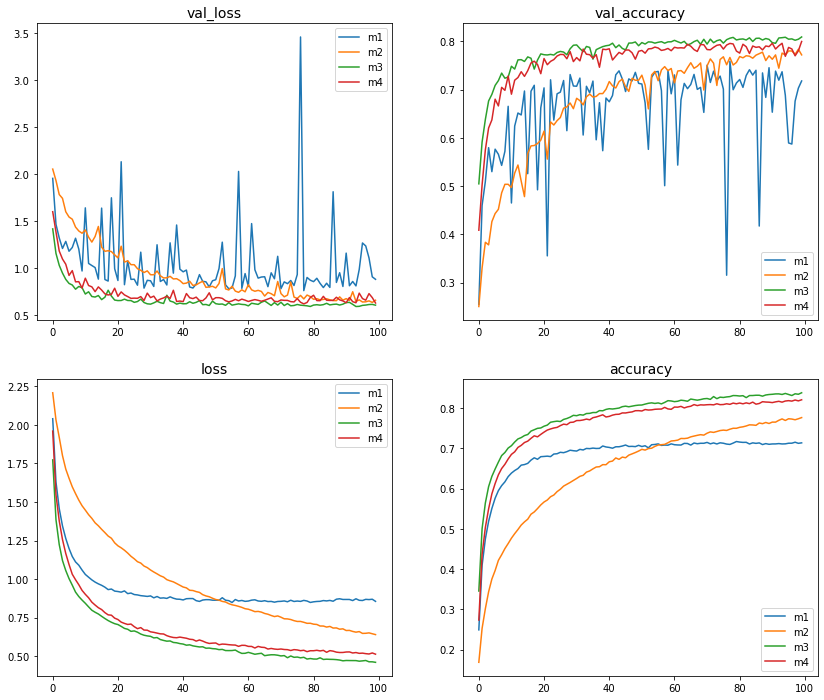

In [ ]:
graphs = {'loss', 'accuracy', 'val_loss', 'val_accuracy'}
histories = {h1,h2,h3,h4}
plt.figure(figsize=(14,12))

for i, graph in enumerate(graphs):
    plt.subplot(2,2,i+1)
    for j,histo in enumerate(histories):
      plt.plot(histo.history[graph], label= "m" + (str)(j+1))
      plt.legend()
      plt.title(graph,fontsize=14)
      print("m" + (str)(j+1) + ": " + graph + "= " + (str)(histo.history[graph][-1]))